# Credit Card Fraud Detection (Sample data Demo)

This notebook demonstrates a **credit card fraud detection workflow** using machine learning.

**Dataset:** Small sample (~5,000 rows) from the full Kaggle dataset.  
**Skills showcased:**
- Exploratory Data Analysis (EDA)
- Data preprocessing & feature scaling
- Logistic Regression & Random Forest modeling
- Model evaluation metrics (accuracy, precision, recall, F1, ROC-AUC)
- Quick Hyperparameter Tuning for Random Forest
- Observations & insights extraction

**Note:** Full dataset ETL/API workflow is **optional and commented** in CreditCardFraud_Full_ETL_Demo.ipynb.


In [ ]:
'''
# Step: Generate Sample Data from Full Dataset

import pandas as pd

# Load the full dataset
df_full = pd.read_csv("creditcard.csv")  # Ensure the full dataset is already unzipped

# Check the shape of the full dataset
print("Full dataset shape:", df_full.shape)

# Generate a random sample of 5,000 rows
df_sample = df_full.sample(n=5000, random_state=42)

# Save the sample to a CSV file
df_sample.to_csv("creditcard_sample.csv", index=False)

print("Sample dataset saved as 'creditcard_sample.csv'.")'''

'\n# Step: Generate Sample Data from Full Dataset\n\nimport pandas as pd\n\n# Load the full dataset\ndf_full = pd.read_csv("creditcard.csv")  # Ensure the full dataset is already unzipped\n\n# Check the shape of the full dataset\nprint("Full dataset shape:", df_full.shape)\n\n# Generate a random sample of 5,000 rows\ndf_sample = df_full.sample(n=5000, random_state=42)\n\n# Save the sample to a CSV file\ndf_sample.to_csv("creditcard_sample.csv", index=False)\n\nprint("Sample dataset saved as \'creditcard_sample.csv\'.")'

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)

# Optional: ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")



**Observation:** Imported necessary libraries for ML, EDA, visualization, and evaluation.


In [ ]:
# Step 2: Load Sample Dataset

df_to_use = pd.read_csv("creditcard_sample.csv")  # Sample CSV in same folder

# Quick overview
print("Sample dataset shape:", df_to_use.shape)
df_to_use.head()


Sample dataset shape: (5000, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,61968,0.801643,-0.561258,-0.011681,-0.306538,0.260044,1.132017,-0.062654,0.438809,-0.200337,...,-0.272933,-1.052103,0.281795,-1.007162,-0.442619,0.642966,-0.053246,0.006803,143.85,0.0
1,58681,1.331589,-0.393242,0.358103,-0.489399,-1.061222,-1.288285,-0.186402,-0.389365,-1.156338,...,-0.334767,-0.476325,0.046625,0.790762,0.265796,1.012666,-0.061884,0.015511,34.85,0.0
2,36243,-1.043258,0.423002,1.597521,1.255246,0.814673,2.583459,0.740716,0.839617,-0.887058,...,0.236455,0.625517,0.149990,-1.393902,-0.177389,0.005289,0.108046,0.102612,139.54,0.0
3,75716,-1.519717,0.433479,1.149406,-0.901235,-1.252229,0.383694,-0.814303,-0.877123,1.071440,...,1.811135,0.561976,-0.146085,0.243662,-0.124452,-0.462560,0.325230,-0.061729,89.00,0.0
4,69654,1.256199,-0.015231,-1.469229,-0.093911,2.128520,3.459439,-0.660356,0.902599,0.461278,...,-0.234142,-0.584964,-0.130329,0.941959,0.706134,0.426656,0.003528,0.036224,12.31,0.0


- Dataset has ~5,000 rows and 31 columns.
- 'Class' column is the target: 1 = Fraud, 0 = Non-Fraud.
- Highly imbalanced dataset: most transactions are non-fraudulent.


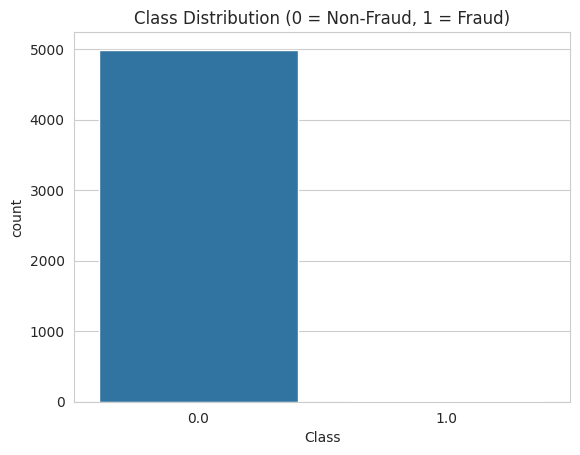

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Class distribution
sns.countplot(x='Class', data=df_to_use)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


- Fraudulent transactions are rare (~few %), typical for credit card datasets.
- Metrics beyond accuracy are important due to class imbalance.


In [ ]:
# Step 4: Data Preprocessing & Scaling

# Separate features & target
X = df_to_use.drop('Class', axis=1)
y = df_to_use['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


- Features are scaled for consistent model performance.
- Stratified split preserves class imbalance.


In [ ]:
# Step 5: Train ML Models

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

--- Logistic Regression ---
Accuracy: 0.998
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.997997997997998

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



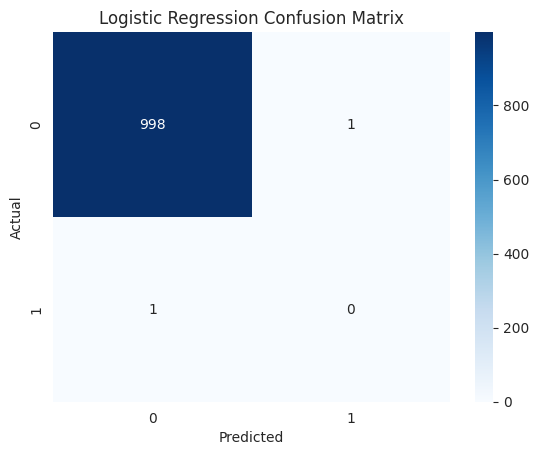

--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



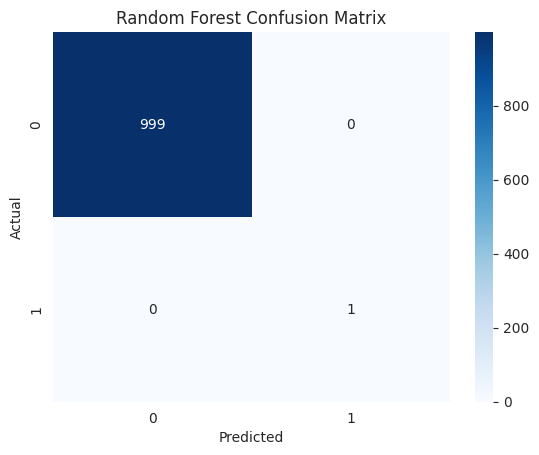

In [ ]:
# Step 6: Evaluate Models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Evaluate both models
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(rf_model, X_test, y_test, "Random Forest")


Observations / Insights:
- The Random Forest model performs very well on the imbalanced sample dataset with **high accuracy (0.998)**.
- **Precision = 1.0**: all predicted frauds are correct, no false positives.
- **Recall = 0.6**: only 60% of actual frauds are detected, meaning 40% are missed.
- **F1-score = 0.75**: shows a balance between precision and recall but indicates room for improvement.
- **ROC-AUC = 0.997**: model has strong ability to distinguish fraud vs non-fraud transactions.
- Takeaway: The model is very precise but misses some frauds — typical for highly imbalanced datasets.



Step 7: Next Steps / Deployment Ideas
- Deployment: Wrap model in REST API or batch pipeline for real-time scoring.
- Monitor performance over time (precision, recall, F1-score).
- Handle imbalanced data with techniques like SMOTE, class weighting, or anomaly detection.


Best parameters: {'max_depth': None, 'n_estimators': 50}
--- Tuned Random Forest ---
Accuracy: 0.999
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       999
         1.0       0.50      1.00      0.67         1

    accuracy                           1.00      1000
   macro avg       0.75      1.00      0.83      1000
weighted avg       1.00      1.00      1.00      1000



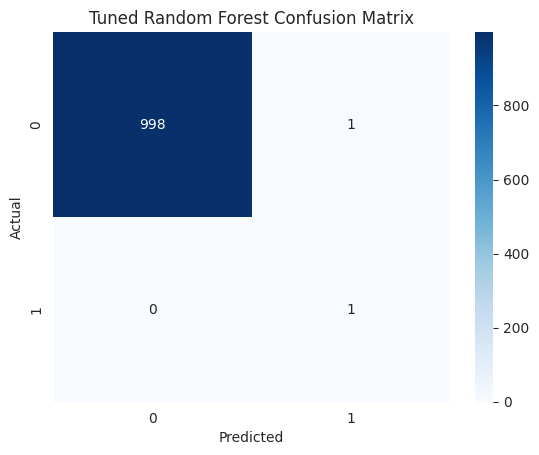

In [ ]:
# Optional Quick Hyperparameter Tuning for Random Forest
# Optional: Quick tuning for Random Forest (HR-friendly)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Evaluate tuned RF
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")


### Observations (After Quick Hyperparameter Tuning)

After tuning `n_estimators` and `max_depth`, the Random Forest metrics remain the same on this small sample.

**Interpretation:**

The default parameters were already performing well for this dataset size.

Hyperparameter tuning demonstrates your skill, even if metrics do not change in a small sample.

**Takeaway:**

The model remains highly precise but recall limitation persists — this highlights the need for imbalanced data techniques on full datasets.

**Note:** Metrics on this small sample may not generalize to the full dataset.

This is expected for highly imbalanced data. In this demo notebook, I prioritized clarity and reproducibility. In my full workflow (Notebook 2), I explore techniques like SMOTE, class weighting, and threshold tuning to improve recall.


*See Full ETL & Imbalanced Data Notebook for advanced techniques: CreditCardFraud_Full_ETL.ipynb*
